In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [34]:
pd.get_dummies(df, columns = ['town'], drop_first = True)

,area,price,town_robinsville,town_west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [35]:
X = pd.get_dummies(df, columns = ['town'], drop_first = True).drop('price', axis = 'columns')
X

,area,town_robinsville,town_west windsor
0,2600,0,0
1,3000,0,0
2,3200,0,0
3,3600,0,0
4,4000,0,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,1,0


In [6]:
y = df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [7]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [8]:
# 2600 sqr ft home in new jerseys

model.predict(X)

array([539709.7398409 , 590468.71640507, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277575])

In [9]:
model.score(X,y)

0.9573929037221872

In [10]:
# 3400 sqr ft home in west windsor

model.predict([[3400, 0, 1]])

array([681241.6684584])

In [11]:
# 2800 sqr ft home in robbinsville

model.predict([[2800, 1, 0]])

array([590775.63964739])

In [16]:
#Using SkLearn One Hot encoding

le = LabelEncoder()
df.town = le.fit_transform(df.town)
df


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [18]:
j = df[['town', 'area']].values
j

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [22]:
k = df.price.values
k

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [6]:
df1 = pd.read_csv('carprices.csv')
df1

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [7]:
pd.get_dummies(df1, columns = ['Car Model'], drop_first = True)

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [8]:
X = pd.get_dummies(df1, columns = ['Car Model'], drop_first = True).drop('Sell Price($)', axis = 1)
X

,Mileage,Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [9]:
y = df1['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

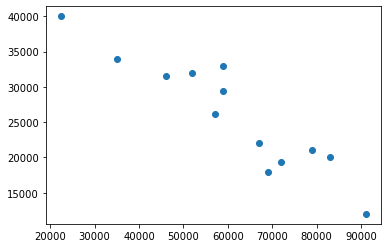

In [13]:
plt.scatter(df1['Mileage'] + df1['Age(yrs)'] , df1['Sell Price($)'])

In [58]:
model.fit(X, y)

LinearRegression()

In [70]:
# Model Accuracy

model.score(X, y)

0.9417050937281082

In [68]:
#Price of mercedez benz that is 4 yr old with mileage 45000

model.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [69]:
#Price of BMW X5 that is 7 yr old with mileage 86000

model.predict([[86000, 7, 1, 0]])

array([11080.74313219])